<a href="https://colab.research.google.com/github/rms5010/deep-learning-practice/blob/main/dl_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [1]:
from tensorflow.keras.models import Sequential # keras 라이브러리의 models class에서 Sequential 함수 불러오기
from tensorflow.keras.layers import Dense, Input # layer class에서 Dense 함수 불러오기
from keras.utils import plot_model # utils class에서 plot_model 함수 불러오기
import numpy as np # numpy를 np로 정의(데이터 잔처리를 위해 사용하는 라이브러리 불러오기)

### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16] # 환자 상태 기록을 X로 지정
y = Data_set[:,16] # 수술 1년 후 사망/생존 여부를 y로 지정

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 2.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [4]:
df.shape

(470, 17)

### 3. 구조 결정

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

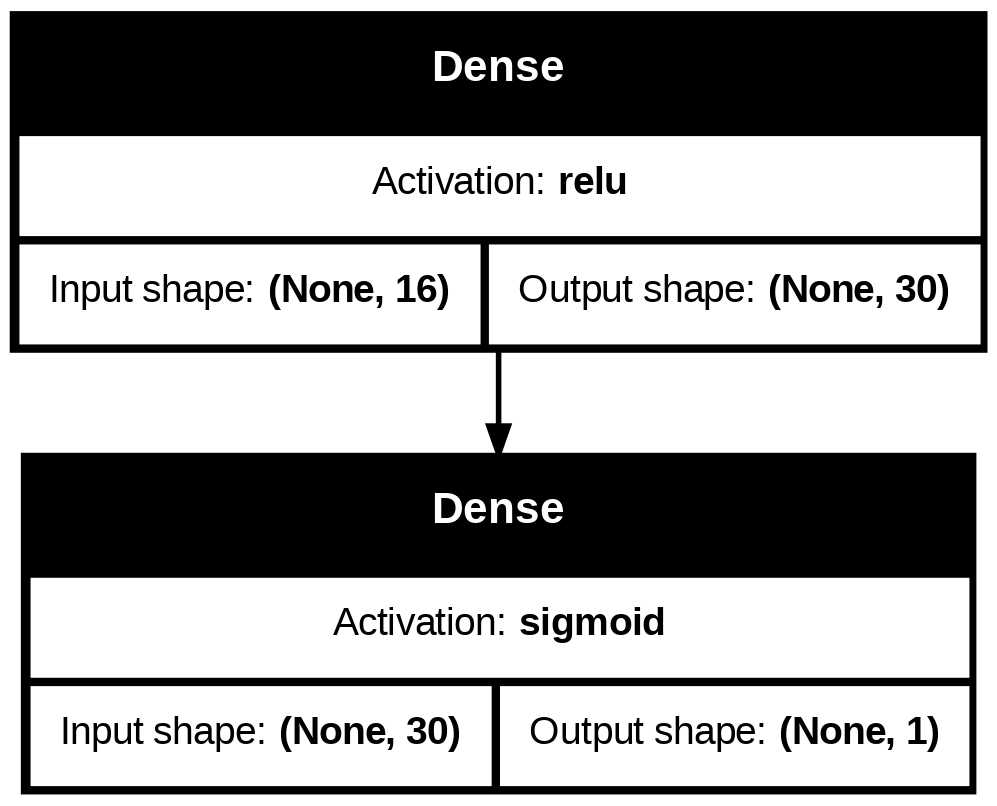

In [5]:
# model = Sequential([
#   Input(shape=(16,))
#   ,Dense(30, activation='relu')
#   ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True, show_layer_activations=True)

### 4. 모델 실행

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=5, batch_size=16) # 각 층을 5번 오가며, 한 번 오갈 때 16개의 데이터를 사용

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4487 - loss: 1.1943
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.5501
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8315 - loss: 0.4528
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.4043
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.4294


In [11]:
history.history # history 객체에서 에포크(epoch)별 손실(loss), 정확도(acc), 검증 손실(val_loss), 검증 정확도(val_acc) 등이 기록된 history 딕셔너리

{'accuracy': [0.6553191542625427,
  0.8340425491333008,
  0.8510638475418091,
  0.8510638475418091,
  0.8510638475418091],
 'loss': [0.8536480665206909,
  0.46542051434516907,
  0.42314550280570984,
  0.42892128229141235,
  0.4203246235847473]}

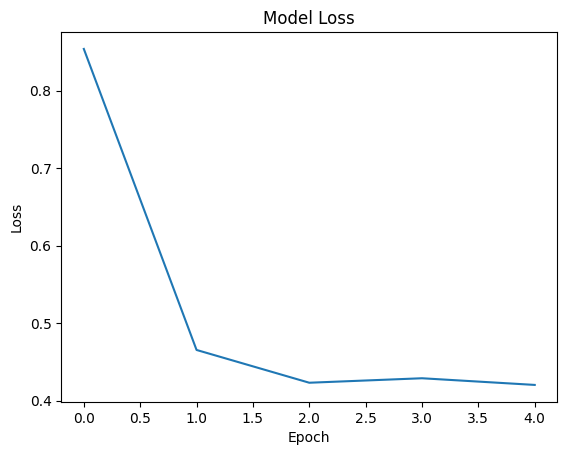

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # history 객체에서 훈련 손실 기록을 꺼내어 선 그래프 그리기
plt.xlabel('Epoch') # x축 레이블 설정: 에포크 수
plt.ylabel('Loss') # y축 레이블 설정: 손실 값
plt.title('Model Loss')
plt.show()

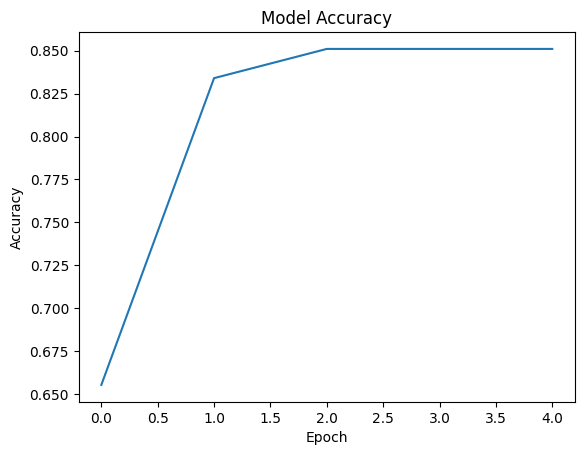

In [9]:
plt.plot(history.history['accuracy']) # history 객체에서 훈련 정확도 기록을 꺼내어 선 그래프 그리기
plt.xlabel('Epoch') # x축 레이블 설정: 에포크 수
plt.ylabel('Accuracy') # y축 레이블 설정: 손실 값
plt.title('Model Accuracy')
plt.show()

In [10]:
loss, accuracy = model.evaluate(X, y) # 전체 데이터(X, y)를 사용해 모델의 손실과 정확도를 평가
print(f"Test Loss: {loss:.4f}") # 평가된 손실 값 출력 (소수점 네 자리까지)
print(f"Test Accuracy: {accuracy:.4f}") # 평가된 정확 값 출력 (소수점 네 자리까지)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8313 - loss: 0.4475  
Test Loss: 0.4137
Test Accuracy: 0.8511


문제 1 : train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요
- 24번째 셀의 evaluate()의 파라미터값도 추가한 변수 중 테스트 데이터셋으로 변경

문제 2: model2라는 변수에 아래 조건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요
- 입력층 동일
- 은닉층1 : 64개의 뉴런, 활성화함수 ReLU 사용
- 은닉층2 : 32개의 뉴런, 활성화함수 ReLU 사용
- 출력층 동일

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5942 - loss: 0.7692
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.4145 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8506 - loss: 0.4271 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.4173 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3715 


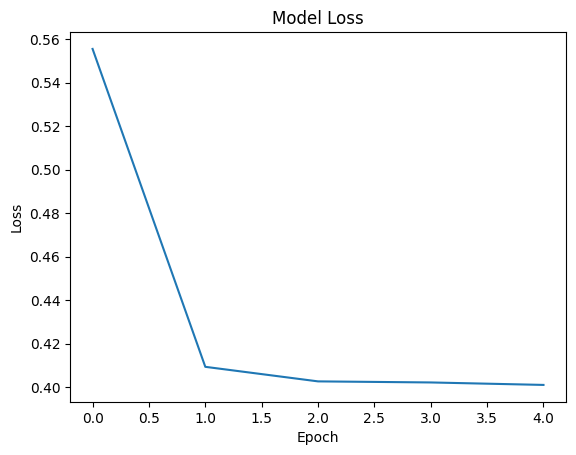

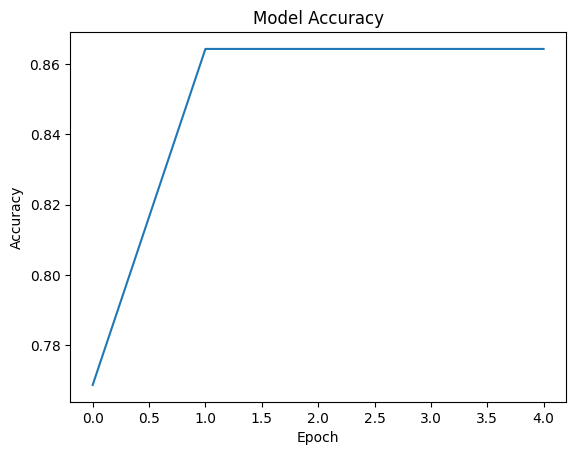

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7974 - loss: 0.5830 
Test Loss: 0.6028
Test Accuracy: 0.7979


In [16]:
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 모듈 추가

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]  # 특성
y = Data_set[:,16]    # 타깃(생존 여부)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=16)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.6628
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.4269 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8577 - loss: 0.4205 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3849 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.3409 


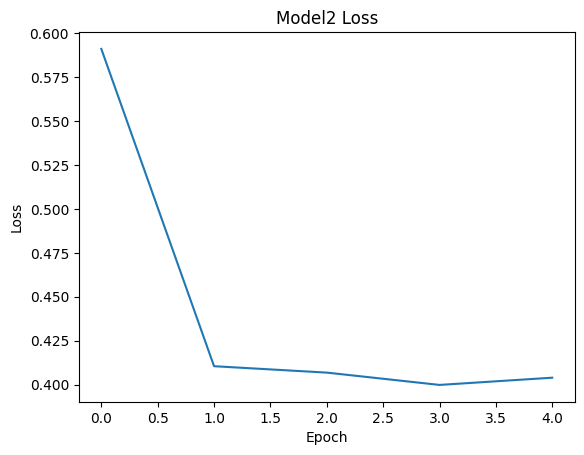

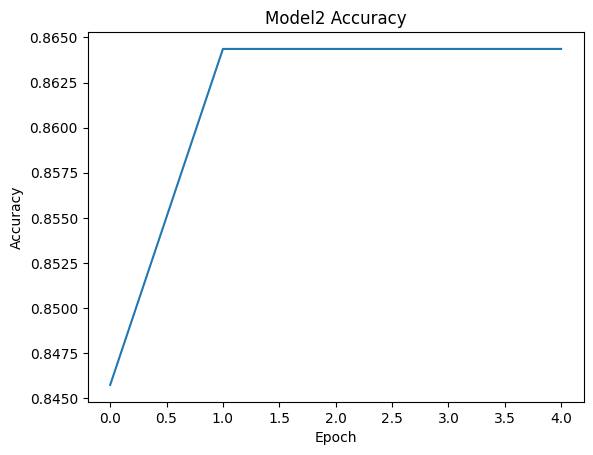

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7974 - loss: 0.5733 
[Model2] Test Loss: 0.5880
[Model2] Test Accuracy: 0.7979


In [17]:
# model2 정의
model2 = Sequential()
model2.add(Input(shape=(16,)))                # 입력층 (입력 데이터 특성 수: 16개)
model2.add(Dense(64, activation='relu'))      # 은닉층 1: 64개의 뉴런
model2.add(Dense(32, activation='relu'))      # 은닉층 2: 32개의 뉴런
model2.add(Dense(1, activation='sigmoid'))    # 출력층: 이진 분류

# 모델 구조 확인
model2.summary()

# 컴파일 및 학습
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=16)

# 시각화 (선택사항)
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model2 Loss')
plt.show()

plt.plot(history2.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model2 Accuracy')
plt.show()

# 테스트 데이터로 평가
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"[Model2] Test Loss: {loss2:.4f}")
print(f"[Model2] Test Accuracy: {accuracy2:.4f}")